In [1]:

import numpy as np
import scipy as sc
from scipy.stats import multivariate_normal
from scipy.stats import norm
from scipy.stats import uniform

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs

plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 6]

np.random.seed()

# Non-linearities used at the layers


*   Define the non-linearities for forward propagation
*   Define the gradient of the non-linearities for backward propagation

The widely used non-linearities are


1.   Sigmoid

$$\eta(x) = \frac{1}{1+e^{-x}};~~~~ \eta'(x) = \eta(x)~(1-\eta(x))$$


2.  Rectified Linear Unit

$$\eta(x) = \left\{\begin{array}{ccc} x & \mbox{if} & x>0\\
0&\mbox{else}\end{array}\right.;~~~~ \eta'(x) = \left\{\begin{array}{ccc} 1 & \mbox{if} & x>0\\
0&\mbox{else}\end{array}\right.;$$


#### <font color=red> MODIFY THE forward and backward methods of the non-linearities BELOW </font>




In [97]:


class relu:
    def __init__(self):
        self.x = None

    def forward(self,x):
        self.x = x
        return np.maximum(np.zeros(x.shape), x)

    def backward(self,dy):
        diff = self.x > 0
        self.x = None
        return np.multiply(dy,diff)

class sigmoid:
    def __init__(self):
        self.x = None

    def forward(self,x):

        # YOUR CODE HERE
        self.x = x
        return 1 / (1 + np.exp(-x))

    def backward(self,dy):

        # YOUR CODE HERE
        diff = np.multiply(self.forward(self.x), (1 - self.forward(self.x)))
        self.x = None
        return np.multiply(dy,diff)


# Test the non-linearity implementations

In [98]:
nl = sigmoid()
x = np.arange(-2,2,0.1)
y = nl.forward(x)
x.shape, y.shape

((40,), (40,))

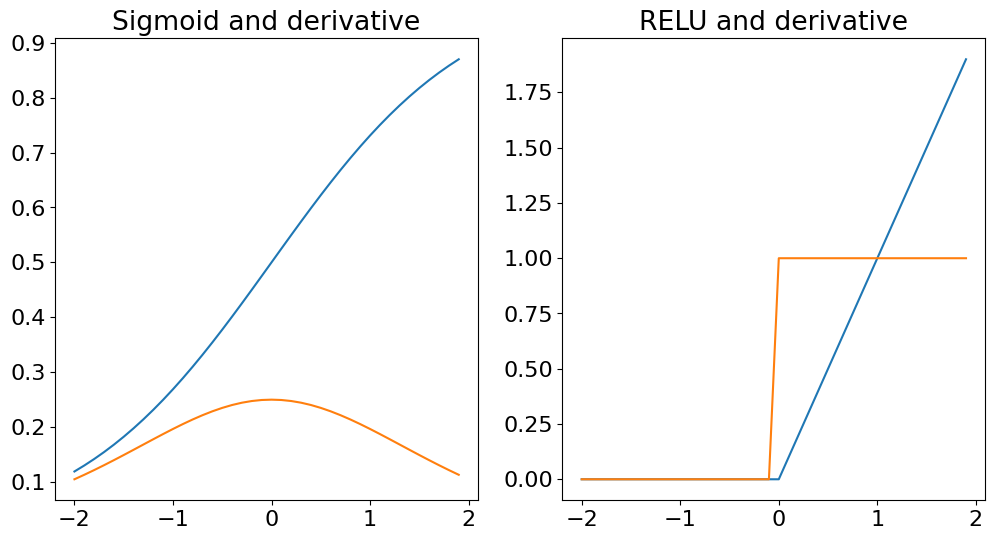

In [99]:
nl = sigmoid()
x = np.arange(-2,2,0.1)
s=plt.subplot(121)
y = nl.forward(x)
s=plt.plot(x,y)
y = nl.backward(np.ones_like(x))
s=plt.plot(x,y)
s=plt.title('Sigmoid and derivative')

nl = relu()
x = np.arange(-2,2,0.1)
s=plt.subplot(122)
y = nl.forward(x)
s=plt.plot(x,y)
y = nl.backward(np.ones_like(x))
s=plt.plot(x,y)
s=plt.title('RELU and derivative')



# Linear Layer

The linear layer $$\mathbf Y = L(\mathbf X)$$ takes $\mathbf X$ of size $M\times P$ and translates it to $\mathbf Y$ of dimension $N\times P$. It performs

$$\mathbf Y= \mathbf W \mathbf X + \mathbf b.$$ Here $\mathbf W$ is of dimension $N\times M$ and $\mathbf b $ is of dimension $N\times 1$

The backward step need to compute

$\nabla_X C $, $\nabla_W  C= \nabla_Y C \times X^T$, and $\nabla_b C = \nabla_Y  C \times \mathbf 1$

The intermediate variable $\mathbf X$ need to be saved during the forward pass

#### <font color=red> MODIFY THE CODE BELOW </font>


In [100]:
class LinearLayer:
    def __init__(self,M,N):
        self.W = np.random.randn(N, M) * 0.1
        self.b =np.zeros(shape =(N, 1))
        self.Wgrad = None
        self.bgrad = None
        self.X = None

    def forward(self,X):
        # YOUR CODE HERE
        self.X = X
        return self.W @ X + self.b

    def backward(self,dY):
        # YOUR CODE HERE
        diff = self.W.T @ dY
        self.Wgrad = dY @ self.X.T
        self.bgrad = dY @ np.ones((dY.shape[1],1))
        self.X = diff

        return diff

## Test the linear layer


In [101]:
Noutput =1
P = 100
M=50
N=25
X = np.random.rand(M,P)
L = LinearLayer(M,N)
Y = L.forward(X)

if(Y.shape[0] != N or Y.shape[1] !=P):
  print("Error in dimensions for Linear forward; recheck your code")

dX = L.backward(np.ones_like(Y))
if(dX.shape != X.shape):
  print("Error in dimensions for dX; recheck your code")

if(L.Wgrad.shape != L.W.shape):
  print("Error in dimensions for L.Wgrad; recheck your code")

if(L.bgrad.shape != L.b.shape):
  print("Error in dimensions for db; recheck your code")


## Define the losses and their derivatives


*   Define the loss functions for loss evaluation
*   Define the gradient of the loss functions for backpropagation

Note that the losses need to be computed between two vectors $Y\in \mathbb R^{N\times P}$ and $A_2 \in \mathbb R^{N\times P}$. In this assignment, we consider a two class classification problem with $N=1$. $P$ is the number of training data samples or the number of data samples used in a batch. Please refer to the course notes and lecture for details.

The widely used losses are


1.   Cross entropy for two class classification
$$C(a_2,y) = -\frac{1}{P} \sum_{p=1}^P  \left(y_p \log(a_{2,p}) + (1-y_p) \log(1-a_{2,p})\right)$$
The gradient of the loss term with respect to $a_2$ is specified by
$$\nabla_{a_{2,p}}C = -\frac{1}{P} \frac{y-a_{2,p}}{a_{2,p}(1-a_{2,p})}$$


2.   Mean squared error for regression
$$C(a_2,y) = \frac{1}{P} \sum_{p=1}^P  \|a_{2,p}-y_p\|^2$$
The gradient of the loss term with respect to $a_2$ is specified by
$$\nabla_{a_{2,p}}C = \frac{1}{P} 2(a_{2,p}-y_p)$$



#### <font color=red> MODIFY THE CODE BELOW </font>


In [102]:

class cross_entropy:
    def __init__(self):
        self.X = None
        self.Y = None

    def forward(self,X,Y):
        m = Y.shape[1]
        logprobs = np.multiply(np.log(X), Y) + np.multiply((1 - Y), np.log(1 - X))
        cost = - np.sum(logprobs) / m
        cost = np.squeeze(cost)
        self.X = X
        self.Y = Y
        return cost

    def backward(self):
        m = self.Y.shape[1]
        diff = self.X-self.Y
        diff = np.divide(diff,np.multiply(self.X,(1-self.X)))
        self.X = None
        self.Y = None
        return diff

class mse:
    def __init__(self):
        self.X = None
        self.Y = None

    def forward(self,X,Y):
        # YOUR CODE HERE
        P = Y.shape[1]
        err = np.multiply(abs(X - Y), abs(X - Y))
        cost = - np.sum(err) / P

        self.X = X
        self.Y = Y
        return cost

    def backward(self):
        #YOUR CODE HERE
        P = Y.shape[1]
        diff = np.divide(2 * (self.X - self.Y), P)
        self.X = None
        self.Y = None
        return diff


## Test the loss function code


In [103]:
Noutput =1
P = 100
Y1 = np.random.rand(Noutput,P)
Y2 = np.random.rand(Noutput,P)
loss1 = cross_entropy()
cost = loss1.forward(Y1,Y2)
if(np.logical_not(np.isscalar(cost))):
  print("Error in dimensions for cross-entropy loss; recheck your code")

gradient = loss1.backward()
if(gradient.shape != Y1.shape):
  print("Error in dimensions for cross-entropy grad; recheck your code")

loss2 = mse()
cost = loss2.forward(Y1,Y2)
l2loss = np.sum((Y1-Y2)**2)
if((cost-l2loss)>1e-10):
  print("Error in mse; recheck your code")

gradient = loss2.backward()
if(gradient.shape != Y1.shape):
  print("Error in dimensions for mse grad; recheck your code")
if(np.linalg.norm(gradient-2*(Y1-Y2)/P)):
  print("Error in value for mse grad; recheck your code")



### Implement a fully connected Neural Network

Implement a two layer network with Ninput input features, Nhidden features in the hidden layer and Noutput features in the output layer. At each layer, use non-linearities specified in the array Nonlinearities

#### <font color=red> MODIFY THE CODE BELOW </font>


In [90]:
class neural_network:
    def __init__(self,Nhidden,Ninput,Noutput,Nonlinearities):


        self.layer = []

        # BUILD THE NETWORK

        # Add a linear layer with Ninput input features and Nhidden output features
        # YOUR CODE HERE
        self.layer.append(LinearLayer(Ninput, Nhidden))

        # Add a non-linearity
        if(Nonlinearities[0]=='relu'):
            self.layer.append(relu())
        else:
            self.layer.append(sigmoid())

        # Add a linear layer
        # YOUR CODE HERE
        self.layer.append(LinearLayer(Nhidden, Noutput))

        # Add a non-linearity
        if(Nonlinearities[1]=='relu'):
            self.layer.append(relu())
        else:
            self.layer.append(sigmoid())


    def forward(self,X):
        # Forward propagation
        # YOUR CODE HERE
        X = self.layer[0].forward(X)
        X = self.layer[1].forward(X)
        X = self.layer[2].forward(X)
        X = self.layer[3].forward(X)
        return X

    def backward(self,dY):
        # Backward propagation
        # YOUR CODE HERE
        dY = self.layer[3].backward(dY)
        dY = self.layer[2].backward(dY)
        dY = self.layer[1].backward(dY)
        dY = self.layer[0].backward(dY)

        return dY

    def update(self, learning_rate):
        # Updating the parameters of the network according to algorithm
        # YOUR CODE HERE
        self.layer[0].W = self.layer[0].W - self.layer[0].Wgrad * learning_rate
        self.layer[0].b = self.layer[0].b - self.layer[0].bgrad * learning_rate
        self.layer[2].W = self.layer[2].W - self.layer[2].Wgrad * learning_rate
        self.layer[2].b = self.layer[2].b - self.layer[2].bgrad * learning_rate




# Testing if the NN implementation dimensions are right

In [104]:
P = 100
Noutput = 1
X, Y = make_circles(P, factor=.5, noise=.1)
indices0 = np.argwhere(Y==0)[:,0]
indices1 = np.argwhere(Y==1)[:,0]

loss = mse()
Y = np.asmatrix(Y)
X = X.T
print("Dimension of X (Noutput x P) =",X.shape,"Dimension of Y (Noutput x P) =",Y.shape)

Y = np.asmatrix(Y)

Nhidden = 8
Nfeatures = X.shape[0]
Noutputs = Y.shape[0]
Nonlinearities = ['relu','sigmoid']
nn = neural_network(Nhidden,Nfeatures,Noutputs,Nonlinearities)

Ypred = nn.forward(X)
if(Ypred.shape != Y.shape):
  print("Error in dimensions for Y; recheck your code")

error = loss.forward(Ypred,Y)
dYpred = loss.backward()

nn.backward(dYpred)
nn.update(0.1)

Dimension of X (Noutput x P) = (2, 100) Dimension of Y (Noutput x P) = (1, 100)


## Steepest descent optimization scheme

In [105]:
def optimize(nn,X,Y,loss,num_iterations,learning_rate):
    for i in range(0, num_iterations):

        # Forward propagation. Inputs: "X, output Ypred
        Ypred = nn.forward(X)

        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        d = loss.forward(Ypred, Y)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        diffLoss = loss.backward()
        nn.backward(diffLoss)
        nn.update(learning_rate)

        # Print the cost every 1000 iterations
        if i % 500 == 0:
            print ("Cost after iteration % i: % f" % (i, d))

# <font color=blue >Neural network training </font>

In [106]:
X, Y = make_circles(200, factor=.5, noise=.1)
indices0 = np.argwhere(Y==0)[:,0]
indices1 = np.argwhere(Y==1)[:,0]

X = X.T
Y = Y.T
Y = np.asmatrix(Y)

Nhidden = 12
Nfeatures = X.shape[0]
Noutputs = Y.shape[0]
Nonlinearities = ['relu','sigmoid']
nn = neural_network(Nhidden,Nfeatures,Noutputs,Nonlinearities)
loss = mse()

optimize(nn,X,Y,loss,4000,.1)

Cost after iteration  0: -0.251043
Cost after iteration  500: -0.241921
Cost after iteration  1000: -0.211317
Cost after iteration  1500: -0.145863
Cost after iteration  2000: -0.090808
Cost after iteration  2500: -0.062665
Cost after iteration  3000: -0.047572
Cost after iteration  3500: -0.038616


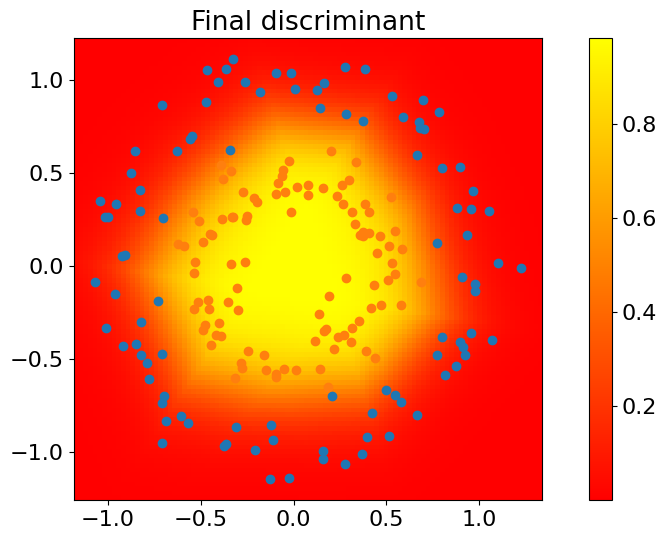

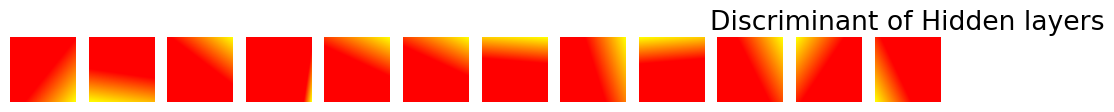

In [107]:
plt.figure()
s = plt.scatter(np.squeeze(np.asarray(X[0,indices0])), np.squeeze(np.asarray(X[1,indices0])))
s = plt.scatter(np.squeeze(np.asarray(X[0,indices1])), np.squeeze(np.asarray(X[1,indices1])))

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
x = np.linspace(xmin,xmax, 100)
y = np.linspace(ymin,ymax, 100)
x1, y1 = np.meshgrid(x, y)
xy = np.vstack([x1.ravel(), y1.ravel()]).T

P = nn.forward(xy.T)
s = plt.imshow(P.reshape(x1.shape),origin='lower',extent=(xmin,xmax,ymin,ymax), cmap=cm.autumn)
s = plt.colorbar()
plt.title('Final discriminant')

fig,axs = plt.subplots(1,nn.layer[2].W.shape[1])
plt.title('Discriminant of Hidden layers')

for i in range(nn.layer[2].W.shape[1]):
    s = axs[i].imshow(nn.layer[2].X[i,:].reshape(x1.shape),origin='lower',extent=(xmin,xmax,ymin,ymax), cmap=cm.autumn)
    axs[i].axis('off')

